In [3]:
import pandas as pd

In [10]:
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\myjob\\netflix_titles.csv\\netflix_titles.csv")

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Set styles for charts
sns.set_theme(style="whitegrid", palette="pastel")

In [11]:
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\myjob\\netflix_titles.csv\\netflix_titles.csv")

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
print(df.info())

print(df.isnull().sum())


print(df.describe(include = 'all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description     

In [19]:
df.dropna(subset=['title','type'], inplace =True)

df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['director'].fillna('Not Available', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

df['date_added'].fillna(method='ffill', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])



df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print("Missing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64


In [25]:
import plotly.express as px

fig = px.pie(df, names='type', title='Movies vs TV Shows Distribution', hole=0.4, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()


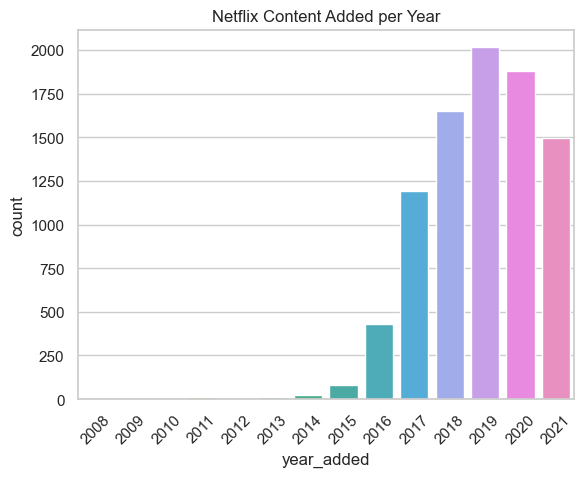

In [21]:
sns.countplot(x='year_added', data=df, order=sorted(df['year_added'].dropna().unique()))
plt.title("Netflix Content Added per Year")
plt.xticks(rotation=45)
plt.show()


In [26]:
country_data = df['country'].value_counts().reset_index().head(10)
country_data.columns = ['Country', 'Count']

fig = px.bar(country_data, x='Country', y='Count', title='Top 10 Countries by Netflix Content', color='Count', text='Count')
fig.update_traces(textposition='outside')
fig.show()


In [27]:
year_data = df['year_added'].value_counts().reset_index().sort_values(by='index')
year_data.columns = ['Year', 'Count']

fig = px.line(year_data, x='Year', y='Count', markers=True, title='Netflix Content Added Over the Years')
fig.show()


In [28]:

genre_data = genres.value_counts().reset_index().head(10)
genre_data.columns = ['Genre', 'Count']

fig = px.bar(genre_data, x='Genre', y='Count', title='Top 10 Netflix Genres', color='Count', text='Count')
fig.update_traces(textposition='outside')
fig.show()
